

_Lambda School Data Science, Unit 2_
 
# Linear Models  Sprint Challenge: Predict home prices in Ames, Iowa 🏠💸

To demonstrate mastery on your Sprint Challenge, do all the required, numbered instructions in this notebook.

To earn a score of "3", also do all the stretch goals.

For your Sprint Challenge, you'll use historical housing data. There's a data dictionary at the bottom of the notebook. 

Run this code cell to load the dataset:





In [2]:
# import needed libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_profiling
import category_encoders as ce

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
# get url for data set and load data frame
URL = 'https://drive.google.com/uc?export=download&id=1522WlEW6HFss36roD_Cd9nybqSuiVcCK'
df = pd.read_csv(URL)

# assert shape of df matches data source
assert df.shape == (2904, 47)

# Data Exploration

In [58]:
# print out first 5 rows
df.head()

1st_Flr_SF  Bedroom_AbvGr Bldg_Type  Bsmt_Full_Bath  Bsmt_Half_Bath  \
0        1656              3      1Fam             1.0             0.0   
1         896              2      1Fam             0.0             0.0   
2        1329              3      1Fam             0.0             0.0   
3        2110              3      1Fam             1.0             0.0   
4         928              3      1Fam             0.0             0.0   

  Central_Air Condition_1 Condition_2 Electrical Exter_Cond  ... Roof_Style  \
0           Y        Norm        Norm      SBrkr         TA  ...        Hip   
1           Y       Feedr        Norm      SBrkr         TA  ...      Gable   
2           Y        Norm        Norm      SBrkr         TA  ...        Hip   
3           Y        Norm        Norm      SBrkr         TA  ...        Hip   
4           Y        Norm        Norm      SBrkr         TA  ...      Gable   

  SalePrice Sale_Condition Sale_Type  Street TotRms_AbvGrd  Utilities  \
0    215000         Normal       WD     Pave             7     AllPub   
1    105000         Normal       WD     Pave             5     AllPub   
2    172000         Normal       WD     Pave             6     AllPub   
3    244000         Normal       WD     Pave             8     AllPub   
4    189900         Normal       WD     Pave             6     AllPub   

   Year_Built Year_Remod/Add Yr_Sold  
0        1960           1960    2010  
1        1961           1961    2010  
2        1958           1958    2010  
3        1968           1968    2010  
4        1997           1998    2010  

[5 rows x 47 columns]

In [2]:
# look at numerical data in data set
df.describe()

1st_Flr_SF  Bedroom_AbvGr  Bsmt_Full_Bath  Bsmt_Half_Bath  \
count  2904.000000    2904.000000     2904.000000     2904.000000   
mean   1158.257231       2.854339        0.431474        0.061639   
std     388.351648       0.827820        0.525073        0.246202   
min     334.000000       0.000000        0.000000        0.000000   
25%     876.750000       2.000000        0.000000        0.000000   
50%    1083.500000       3.000000        0.000000        0.000000   
75%    1383.000000       3.000000        1.000000        0.000000   
max    5095.000000       8.000000        3.000000        2.000000   

         Full_Bath  Gr_Liv_Area    Half_Bath  Kitchen_AbvGr       Lot_Area  \
count  2904.000000  2904.000000  2904.000000    2904.000000    2904.000000   
mean      1.562328  1497.853650     0.376722       1.044421   10130.199725   
std       0.551427   504.591527     0.501416       0.214260    7869.928702   
min       0.000000   334.000000     0.000000       0.000000    1300.000000   
25%       1.000000  1124.000000     0.000000       1.000000    7424.750000   
50%       2.000000  1440.500000     0.000000       1.000000    9429.000000   
75%       2.000000  1740.500000     1.000000       1.000000   11516.250000   
max       4.000000  5642.000000     2.000000       3.000000  215245.000000   

       MS_SubClass      Mo_Sold  Overall_Cond  Overall_Qual      SalePrice  \
count  2904.000000  2904.000000   2904.000000   2904.000000    2904.000000   
mean     57.474174     6.206956      5.567149      6.086777  180383.689738   
std      42.724950     2.712204      1.113736      1.410083   79802.823684   
min      20.000000     1.000000      1.000000      1.000000   12789.000000   
25%      20.000000     4.000000      5.000000      5.000000  129150.000000   
50%      50.000000     6.000000      5.000000      6.000000  160000.000000   
75%      70.000000     8.000000      6.000000      7.000000  213000.000000   
max     190.000000    12.000000      9.000000     10.000000  755000.000000   

       TotRms_AbvGrd   Year_Built  Year_Remod/Add      Yr_Sold  
count    2904.000000  2904.000000     2904.000000  2904.000000  
mean        6.441804  1971.109504     1984.112259  2007.792011  
std         1.573130    30.227141       20.857813     1.318719  
min         2.000000  1872.000000     1950.000000  2006.000000  
25%         5.000000  1953.000000     1965.000000  2007.000000  
50%         6.000000  1973.000000     1993.000000  2008.000000  
75%         7.000000  2000.000000     2004.000000  2009.000000  
max        15.000000  2010.000000     2010.000000  2010.000000

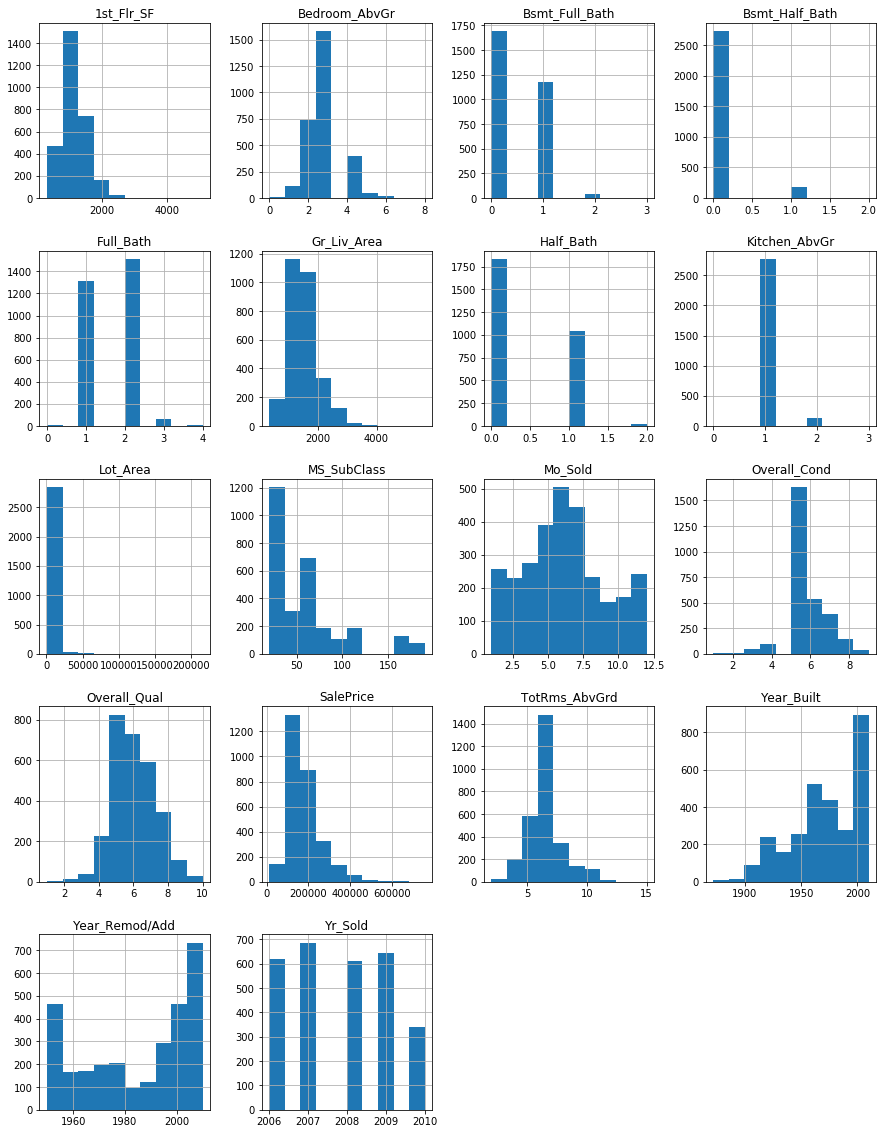

In [9]:
# look at distributions of numerical features
df.hist(figsize=(15,20));

In [15]:
# look at detailed profile report
profile = df.profile_report()
profile

In [17]:
# check for null or missing values
df.isnull().sum()

1st_Flr_SF        0
Bedroom_AbvGr     0
Bldg_Type         0
Bsmt_Full_Bath    0
Bsmt_Half_Bath    0
Central_Air       0
Condition_1       0
Condition_2       0
Electrical        0
Exter_Cond        0
Exter_Qual        0
Exterior_1st      0
Exterior_2nd      0
Foundation        0
Full_Bath         0
Functional        0
Gr_Liv_Area       0
Half_Bath         0
Heating           0
Heating_QC        0
House_Style       0
Kitchen_AbvGr     0
Kitchen_Qual      0
Land_Contour      0
Land_Slope        0
Lot_Area          0
Lot_Config        0
Lot_Shape         0
MS_SubClass       0
MS_Zoning         0
Mas_Vnr_Type      0
Mo_Sold           0
Neighborhood      0
Overall_Cond      0
Overall_Qual      0
Paved_Drive       0
Roof_Matl         0
Roof_Style        0
SalePrice         0
Sale_Condition    0
Sale_Type         0
Street            0
TotRms_AbvGrd     0
Utilities         0
Year_Built        0
Year_Remod/Add    0
Yr_Sold           0
dtype: int64

## 1. Do train/test split
Train on houses sold in the years 2006 - 2008. Test on houses sold in the years 2009 - 2010.

In [59]:
df['Yr_Sold'].sample(1)

2756    2006
Name: Yr_Sold, dtype: int64

In [23]:
# split df into train and test by year sold
df_train = df[df['Yr_Sold'] < 2009]
df_test = df[df['Yr_Sold'] >= 2009]

# assert the split df's are the same size as the original
assert df.shape[0] == df_test.shape[0] + df_train.shape[0]

# print the shapes of the new df's
df_train.shape, df_test.shape

((1920, 47), (984, 47))

## 2. Begin with baselines

What is the Mean Absolute Error and R^2 score for a mean baseline?

In [24]:
# use the mean sale price from the train data set as the base line
df_train['SalePrice'].mean()

181515.98645833333

In [25]:
y_test = df_test['SalePrice']
y_pred = [df_train['SalePrice'].mean()]*len(y_test)

In [26]:
# print out Mean Absolute Error and R^2 for baseline
baseline_mae = mean_absolute_error(y_test, y_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
baseline_r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error for the baseline model: {baseline_mae}')
print(f'Root Mean Squared Error for the baseline model: {baseline_rmse}')
print(f'R^2 for the baseline model: {baseline_r2}')

Mean Absolute Error for the baseline model: 58276.87133934621
Root Mean Squared Error for the baseline model: 79003.33621702573
R^2 for the baseline model: -0.0017922985422960114


## 3. Arrange data into X features matrix and y target vector
Select at least one numeric feature and at least one categorical feature.

In [27]:
# basic linear model to compare baseline to using 1 numeric and 1 categorical feature
# 1st floor sqft above ground as numeric feature
# Building type as categorical feature
features = [
    '1st_Flr_SF',
    'Bldg_Type'
]

target = 'SalePrice'

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

X_train.shape, y_train.shape

((1920, 2), (1920,))

In [28]:
X_train.head()

1st_Flr_SF Bldg_Type
984        1414      1Fam
985        2117      1Fam
986        1092      1Fam
987         926      1Fam
988         680      1Fam

## 4. Do one-hot encoding

Encode your categorical feature(s).

In [29]:
encoder = ce.OneHotEncoder(use_cat_names=True)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [30]:
X_train.head()

1st_Flr_SF  Bldg_Type_1Fam  Bldg_Type_TwnhsE  Bldg_Type_Duplex  \
984        1414               1                 0                 0   
985        2117               1                 0                 0   
986        1092               1                 0                 0   
987         926               1                 0                 0   
988         680               1                 0                 0   

     Bldg_Type_Twnhs  Bldg_Type_2fmCon  
984                0                 0  
985                0                 0  
986                0                 0  
987                0                 0  
988                0                 0

## 5. Use scikit-learn for Linear Regression
Fit your model.

In [31]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 6. Use regression metrics: MAE, R^2
What is the Mean Absolute Error and R^2 score for your model? ***Beat the mean baseline!***

In [33]:
simple_model_mae = mean_absolute_error(y_test, y_pred)
simple_model_r2 = r2_score(y_test, y_pred)
simple_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error for the simple model: {simple_model_mae}')
print(f'Root Mean Squared Error for the simple model: {simple_model_rmse}')
print(f'R^2 for the simple model: {simple_model_r2}')

Mean Absolute Error for the simple model: 44843.6329447925
Root Mean Squared Error for the simple model: 58159.924110243344
R^2 for the simple model: 0.45708169050755443


## 7. Get coefficients of a linear model
Print or plot the coefficients for the features in your model.

In [34]:
encoded_features = X_train.columns

print('Simple Model Coefficients')
print('-'*25)
for i in range(len(encoded_features)):
    print(f'{encoded_features[i]}: {model.coef_[i]}')
    
print('Simple Model Intercept\n')
print(f'Intercept: {model.intercept_}')

Simple Model Coefficients
-------------------------
1st_Flr_SF: 127.05990570375143
Bldg_Type_1Fam: 21454.829717171357
Bldg_Type_TwnhsE: 29853.876750429048
Bldg_Type_Duplex: -55837.717498142985
Bldg_Type_Twnhs: 21949.25692608738
Bldg_Type_2fmCon: -17420.2458955447
Simple Model Intercept

Intercept: 15630.335923165316


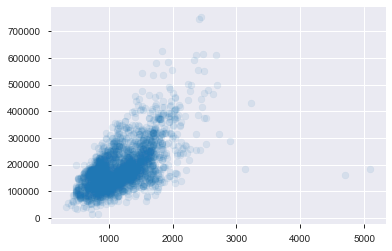

In [35]:
plt.scatter(df['1st_Flr_SF'], df['SalePrice'], alpha=0.1)
plt.show();

## Stretch Goals
- Try at least 3 different feature combinations.
- Plot exploratory visualizations.
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [45]:
# select features for multiple models
features_1 = [
    '1st_Flr_SF',
    'Lot_Area',
    'Bldg_Type',
    'Central_Air',
    'Heating'
]

features_2 = [
    '1st_Flr_SF',
    'Bldg_Type',
    'Central_Air',
    'Exter_Cond',
    'House_Style'
]

target = 'SalePrice'

In [39]:
# model with features_1
X_train = df_train[features_1]
y_train = df_train[target]

X_test = df_test[features_1]
y_test = df_test[target]
# encode and scale features
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit model and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics rmse, mae, r2score
features_1_mae = mean_absolute_error(y_test, y_pred)
features_1_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
features_1_r2 = r2_score(y_test, y_pred)

In [40]:
# model with features_2
X_train = df_train[features_2]
y_train = df_train[target]

X_test = df_test[features_2]
y_test = df_test[target]
# encode and scale features
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit model and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics rmse, mae, r2score
features_2_mae = mean_absolute_error(y_test, y_pred)
features_2_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
features_2_r2 = r2_score(y_test, y_pred)

In [44]:
# print out the metrics for all models

# baseline
print('Baseline Metrics')
print(f'MAE: {baseline_mae}')
print(f'RMSE: {baseline_rmse}')
print(f'R^2: {baseline_r2}\n')

# simple linear regression
print('Simple Linear Regression Metrics')
print(f'MAE: {simple_model_mae}')
print(f'RMSE: {simple_model_rmse}')
print(f'R^2: {simple_model_r2}\n')

# features_1
print('Features_1 Metrics')
print(f'MAE: {features_1_mae}')
print(f'RMSE: {features_1_rmse}')
print(f'R^2: {features_1_r2}\n')

# features_2
print('Features_2 Metrics')
print(f'MAE: {features_2_mae}')
print(f'RMSE: {features_2_rmse}')
print(f'R^2: {features_2_r2}\n')

Baseline Metrics
MAE: 58276.87133934621
RMSE: 79003.33621702573
R^2: -0.0017922985422960114

Simple Linear Regression Metrics
MAE: 44843.6329447925
RMSE: 58159.924110243344
R^2: 0.45708169050755443

Features_1 Metrics
MAE: 43421.526612568785
RMSE: 56578.63289751861
R^2: 0.48620281004877053

Features_2 Metrics
MAE: 33704.65769877061
RMSE: 46928.201266065706
R^2: 0.6465283051312045



## Data Dictionary 

Here's a description of the data fields:

```
1st_Flr_SF: First Floor square feet

Bedroom_AbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Bldg_Type: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
       
Bsmt_Half_Bath: Basement half bathrooms

Bsmt_Full_Bath: Basement full bathrooms

Central_Air: Central air conditioning

       N	No
       Y	Yes
		
Condition_1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition_2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
       
 Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
       
 Exter_Cond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
 
 Exter_Qual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Exterior_1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior_2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
Full_Bath: Full bathrooms above grade

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Gr_Liv_Area: Above grade (ground) living area square feet
        
Half_Bath: Half baths above grade

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
Heating_QC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

House_Style: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Kitchen_AbvGr: Kitchens above grade

Kitchen_Qual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Land_Slope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Lot_Area: Lot size in square feet

Lot_Config: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

Lot_Shape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

MS_SubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MS_Zoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Mas_Vnr_Type: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Mo_Sold: Month Sold (MM)

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Overall_Cond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Overall_Qual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

Paved_Drive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Roof_Matl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Roof_Style: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

SalePrice: the sales price for each house

Sale_Condition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Sale_Type: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
	
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
TotRms_AbvGrd: Total rooms above grade (does not include bathrooms)

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
Year_Built: Original construction date

Year_Remod/Add: Remodel date (same as construction date if no remodeling or additions)
						
Yr_Sold: Year Sold (YYYY)	

```